# Plot cork trajectory data

In [1]:
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
import sys
# from .data.regresstools import lowess
from datetime import datetime
import time
import pickle
import pandas as pd

import trackpy as tp

%matplotlib qt5

In [2]:
homechar = "C:\\"

# day = "April10"
day = "April11"

vid = "pi71_1554994358" # ?
vid = "pi71_1554994823" # 70% flow?
# vid = "pi71_1554995860" # 70?

In [3]:
inptfile = os.path.join(homechar, "Projects", "ptv-aquatron2019", "data", "processed", vid + ".pkl")

infile = open(inptfile,'rb')
data = pickle.load(infile)
infile.close()


In [4]:
# fig1 = plt.figure(figsize=(12,8), num='trajectories')
# ax1 = plt.subplot(2,2,1)
# tp.plot_traj(data, colorby='particle')
# ax1.xlim([0, 1640])
# ax1.ylim([1232, 0])

In [5]:
# data.loc[data['frame'] == 30]

In [6]:
# data.pivot_table('x','y','particle')

In [7]:
# data2 = data.set_index('particle')
# data2.sort_index()


In [8]:
## initialize empty dataframe with all fields in place (might be better way to do this)
# df0 = data[data['particle'] == -1]
df0 = pd.DataFrame()

pathlen = []

pmax = np.max(data['particle'].values)
# pmax = 10000

for i in range(0, pmax):
    
    # organize by particle
    df2 = data[data['particle'] == i]
    
    if not df2.empty:
        
        pathlen.append(len(df2))
    
        # compute difference
        df3 = df2.groupby('particle').diff()#/df2['frame'].values
        dx = df3['x']
        dy = df3['y']
        dframe = df3['frame']

        # velocity components
        u = dx/dframe
        v = dy/dframe
        uvel = pd.DataFrame({'u': u})
        vvel = pd.DataFrame({'v': v})

        # join velocities with temp dataframe, then append to new dataframe
        dfvel = df2.join(uvel)
        dfvel = dfvel.join(vvel)
        df0 = df0.append(dfvel)
        
df0        

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,u,v
frame,,,,,,,,,,,,
0,1185.496415,520.211747,5125.748827,2.978873,0.257332,146.226549,13243.0,0.000045,0,22,NaN,NaN
1,1180.171868,519.218447,5107.649265,3.014620,0.413147,157.822829,11968.0,0.000051,1,22,-0.993299,-5.324547
2,1178.422752,519.903138,5184.100334,3.059558,0.398198,155.648154,12225.0,0.000046,2,22,0.684691,-1.749116
3,1179.642435,521.415219,4380.604675,2.715023,0.285976,163.145170,9687.0,0.000052,3,22,1.512081,1.219683
4,1178.674207,521.064234,4771.720414,2.847975,0.324605,157.586539,10715.0,0.000044,4,22,-0.350986,-0.968228
5,1176.886245,519.811022,5177.976524,2.914080,0.362357,153.415638,11726.0,0.000040,5,22,-1.253211,-1.787962
6,1173.339981,517.455291,4855.725356,3.250133,0.548703,155.401953,10714.0,0.000045,6,22,-2.355731,-3.546264
7,1174.665112,517.412780,4932.102576,2.899890,0.240430,146.460136,12238.0,0.000043,7,22,-0.042511,1.325131
8,1170.405479,514.468119,4926.994816,3.079243,0.431043,153.129925,11457.0,0.000044,8,22,-2.944661,-4.259633


In [9]:
len(pathlen)

895

In [10]:
# %matplotlib qt5



In [11]:
# initialize grid
nx = 1640
ny = 1232
dn = 5

xgrid = np.arange(0, nx+1, dn)
ygrid = np.arange(0, ny+1, dn)
xxgrid, yygrid = np.meshgrid(xgrid, ygrid)
ugrid = np.zeros(np.shape(xxgrid))
vgrid = np.zeros(np.shape(yygrid))
gridcount = np.zeros(np.shape(xxgrid))

In [12]:
# loop through all entries and append velocity to relevant bin
for j in range(0, len(df0)):
    if not np.isnan(df0['u'].values[j]):
        ugrid[(df0['y'].values[j]/dn).astype(int), (df0['x'].values[j]/dn).astype(int)] += df0['u'].values[j]
    if not np.isnan(df0['v'].values[j]):    
        vgrid[(df0['y'].values[j]/dn).astype(int), (df0['x'].values[j]/dn).astype(int)] += df0['v'].values[j]
    gridcount[(df0['y'].values[j]/dn).astype(int), (df0['x'].values[j]/dn).astype(int)] += 1.

In [13]:
umean = np.divide(ugrid.astype(float),gridcount.astype(float))
vmean = np.divide(vgrid.astype(float),gridcount.astype(float))

C:\Users\Owner\Anaconda3\envs\aquatron_ptv\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Users\Owner\Anaconda3\envs\aquatron_ptv\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


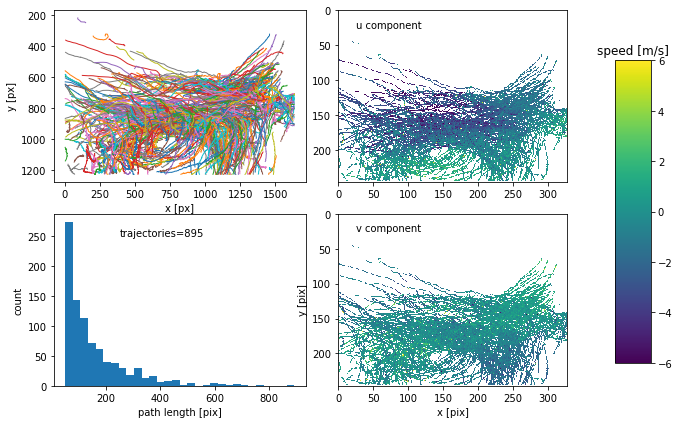

In [14]:
fig2 = plt.figure(num='trajectory data', figsize=(10,6))
ax23 = plt.subplot(223)
ax23.hist(pathlen, bins=30)
ax23.set_xlabel('path length [pix]')
ax23.set_ylabel('count')
ax23.text(250, 250, 'trajectories=' + str(len(pathlen)))

ax22 = plt.subplot(222)
im22 = ax22.imshow(umean)
# ax22.set_ylabel('y [pix]')
ax22.text(25, 25, 'u component')

# fig2.tight_layout()

ax24 = plt.subplot(224)
im24 = ax24.imshow(vmean)
ax24.set_xlabel('x [pix]')
ax24.set_ylabel('y [pix]')
ax24.text(25, 25, 'v component')


fig2.tight_layout()

plt.set_cmap('bwr')

fig2.subplots_adjust(right=0.8)
cbar_ax = fig2.add_axes([0.85, 0.15, 0.05, 0.7])
clb = fig2.colorbar(im22, cax=cbar_ax)
# plt.show()
im22.set_clim(vmin=-6, vmax=6)
im24.set_clim(vmin=-6, vmax=6)
clb.ax.set_title('speed [m/s]')

# fig2.tight_layout()




# fig1 = plt.figure(figsize=(12,8), num='trajectories')
ax21 = plt.subplot(221)
tp.plot_traj(data, colorby='particle')
# ax21.xlim([0, 1640])
# ax21.ylim([1232, 0])

Text(0.5, 1.0, 'speed [pix/s]')

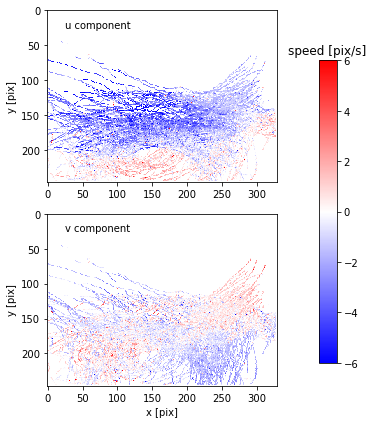

In [15]:
fig2 = plt.figure(num='velocity', figsize=(5,6))

ax22 = plt.subplot(211)
im22 = ax22.imshow(umean)
ax22.set_ylabel('y [pix]')
ax22.text(25, 25, 'u component')

ax24 = plt.subplot(212)
im24 = ax24.imshow(vmean)
ax24.set_xlabel('x [pix]')
ax24.set_ylabel('y [pix]')
ax24.text(25, 25, 'v component')


fig2.tight_layout()

plt.set_cmap('bwr')

fig2.subplots_adjust(right=0.8)
cbar_ax = fig2.add_axes([0.85, 0.15, 0.05, 0.7])
clb = fig2.colorbar(im22, cax=cbar_ax)
# plt.show()
im22.set_clim(vmin=-6, vmax=6)
im24.set_clim(vmin=-6, vmax=6)
clb.ax.set_title('speed [pix/s]')

# fig2.tight_layout()


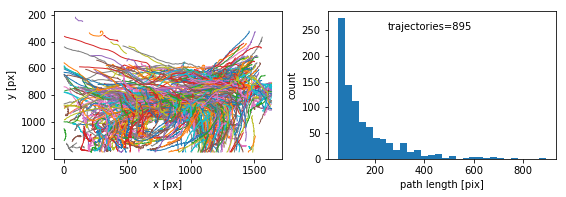

In [16]:
fig3 = plt.figure(num='trajectories', figsize=(9,6))
ax32 = plt.subplot(222)
ax32.hist(pathlen, bins=30)
ax32.set_xlabel('path length [pix]')
ax32.set_ylabel('count')
ax32.text(250, 250, 'trajectories=' + str(len(pathlen)))

# fig1 = plt.figure(figsize=(12,8), num='trajectories')
ax31 = plt.subplot(221)
tp.plot_traj(data, colorby='particle')
# ax21.xlim([0, 1640])
# ax21.ylim([1232, 0])

In [357]:
savedn = os.path.join('C:\\','Projects','ptv-aquatron2019','reports','figures','trajectories', vid) 
if not os.path.exists(savedn):
    try:
        os.makedirs(savedn)
    except OSError as exc: # Guard against race condition
        if exc.errno != errno.EEXIST:
            raise

fig1.savefig(os.path.join(savedn, 'all.png'), dpi=1000, transparent=True)
fig1.savefig(os.path.join(savedn, 'all.pdf'), dpi=None, transparent=True)

fig2.savefig(os.path.join(savedn, 'trajectories_and_histogram.png'), dpi=1000, transparent=True)
fig2.savefig(os.path.join(savedn, 'trajectories_and_histogram.pdf'), dpi=None, transparent=True)

fig3.savefig(os.path.join(savedn, 'velocity.png'), dpi=1000, transparent=True)
fig3.savefig(os.path.join(savedn, 'velocity.pdf'), dpi=None, transparent=True)

# Rotate coordinates

In [358]:
angle_pi71 = np.pi - 0.2682013644206911 # rad
angle_pi73 = np.pi - -0.11809202841909477 # rad

theta_jet = angle_pi71

# rotation matrix
R = [[np.cos(theta_jet), np.sin(theta_jet)], [-np.sin(theta_jet), np.cos(theta_jet)]]

In [359]:
data_p = data.copy()
# data_p

In [360]:
# data_p['xp'] = data_p.apply(rotate_coord, axis=1)

xvec = np.squeeze([data_p['x'].values, data_p['y'].values])
xvec.shape

xvec_rot = np.matmul(R, xvec)
xvec_rot[1]

# xpr = pd.DataFrame({'xp': xvec_rot[0]})
# ypr = pd.DataFrame({'yp': xvec_rot[1]})

# xpr = pd.DataFrame({'particle': data_p['particle'], 'xp': xvec_rot[0]})
# ypr = pd.DataFrame({'frame': data_p['frame'], 'yp': xvec_rot[1]})

xpr = pd.DataFrame({'frame': data_p['frame'], 'xp': xvec_rot[0]})
ypr = pd.DataFrame({'frame': data_p['frame'], 'yp': xvec_rot[1]})

In [361]:
# this adds an additional 'frames' column. Not sure how to avoid this
# took a while to maintain indices of rotated coordinates
data_rot = pd.concat([data_p, ypr], axis=1)# sort=False
data_rot = pd.concat([data_pp, xpr], axis=1)# sort=False
# data_rot['frame']

# delete duplicate 'frame' columns
data_rot = data_rot.loc[:,~data_rot.columns.duplicated()]

data_rot

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,yp,xp
frame,,,,,,,,,,,,
0,1185.496415,520.211747,5125.748827,2.978873,0.257332,146.226549,13243.0,0.000045,0,22,-1005.259009,187.460077
0,664.257523,1473.942578,3118.457105,1.878453,0.127235,199.399840,5125.0,0.000117,0,44,-249.918564,1245.221184
0,660.327610,1366.877542,5191.433480,2.584846,0.185603,160.301832,11211.0,0.000054,0,45,-274.501119,1143.025238
0,611.500000,1402.996719,4766.829115,2.347585,0.120998,174.377115,9680.0,0.000062,0,49,-217.847648,1190.792318
0,592.061311,1390.438507,6453.517173,3.039962,0.058403,126.677545,16525.0,0.000036,0,52,-202.431805,1183.834278
0,705.068018,1288.302343,6173.575437,2.902468,0.094516,134.497147,15012.0,0.000040,0,62,-338.464251,1055.403076
0,814.997125,1280.657377,3535.241868,2.003867,0.171374,195.490039,6138.0,0.000098,0,64,-446.489189,1018.900482
0,799.971623,1466.523534,4601.835522,2.301601,0.056644,177.504956,9180.0,0.000065,0,68,-382.746790,1202.103476
0,799.006782,1134.719920,3112.983384,2.219663,0.307591,183.760637,6157.0,0.000098,0,69,-469.743583,882.417823


In [362]:
## initialize empty dataframe with all fields in place (might be better way to do this)
# df0 = data[data['particle'] == -1]
df00 = pd.DataFrame()

pmax = np.max(data['particle'].values)
# pmax = 10000

for i in range(0, pmax):
    
    # organize by particle
    df02 = data_rot[data_rot['particle'] == i]
    
    if not df02.empty:
    
        # compute difference
        df03 = df02.groupby('particle').diff()#/df02['frame'].values
        dx_rot = df03['xp']
        dy_rot = df03['yp']
        dframe = df03['frame']

        # velocity components
        u_rot = dx_rot/dframe
        v_rot = dy_rot/dframe
        uvel_rot = pd.DataFrame({'u': u_rot})
        vvel_rot = pd.DataFrame({'v': v_rot})

        # join velocities with temp dataframe, then append to new dataframe
        dfvel_rot = df02.join(uvel_rot)
        dfvel_rot = dfvel_rot.join(vvel_rot)
        df00 = df00.append(dfvel_rot)
# df00        

In [363]:
# df00

In [364]:
minx = np.min(df00['xp'].values)
minx

-297.7735865280506

In [365]:
# initialize grid
# nx = 1640
# ny = 1232
dn = 5

minx = np.min(df00['xp'].values).astype(int)
maxx = np.max(df00['xp'].values).astype(int)
miny = np.min(df00['yp'].values).astype(int)
maxy = np.max(df00['yp'].values).astype(int)


xgrid = np.arange(minx, maxx+1, dn)
ygrid = np.arange(miny, maxy+1, dn)
xxgrid, yygrid = np.meshgrid(xgrid, ygrid)
ugrid = np.zeros(np.shape(xxgrid))
vgrid = np.zeros(np.shape(yygrid))
gridcount = np.zeros(np.shape(xxgrid))

In [366]:
# loop through all entries and append velocity to relevant bin
for j in range(0, len(df00)):
    if not np.isnan(df00['u'].values[j]):
        ugrid[(df00['yp'].values[j]/dn).astype(int), (df00['xp'].values[j]/dn).astype(int)] += df00['u'].values[j]
    if not np.isnan(df00['v'].values[j]):    
        vgrid[(df00['yp'].values[j]/dn).astype(int), (df00['xp'].values[j]/dn).astype(int)] += df00['v'].values[j]
    gridcount[(df00['yp'].values[j]/dn).astype(int), (df00['xp'].values[j]/dn).astype(int)] += 1.

In [367]:
umean = np.divide(ugrid.astype(float),gridcount.astype(float))
vmean = np.divide(vgrid.astype(float),gridcount.astype(float))

C:\Users\Owner\Anaconda3\envs\aquatron_ptv\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Users\Owner\Anaconda3\envs\aquatron_ptv\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [368]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9.3, 7.5))
im0 = ax[0].imshow(umean)
im1 = ax[1].imshow(vmean)
# fig.colorbar()

plt.set_cmap('bwr')
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im0, cax=cbar_ax)
plt.show()

# plt.imshow(vmean)
# plt.colorbar()

# fig, axes = plt.subplots(nrows=2, ncols=2)
# for ax in axes.flat:
#     im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(im, cax=cbar_ax)

# plt.show()

In [ ]:
% Given data vectors X and Y.  
% Want to rotate the data  through angle "ang" about rotation center Xc, Yc
X = [..];
Y = [..];
ang = ..;
% Specify the coordinates of the center of rotation
Xc = 0.25 ;  % Rotate about the 1/4 chord point
Yc = 0 ;
% The data is roated in a three-step process
% Step 1) Shift the data to the rotation center
Xs = X - Xc;  % shifted data
Ys = Y - Yc;
% Step 2) Rotate the data
Xsr =  Xs*cos(ang) + Ys*sin(ang);    % shifted and rotated data
Ysr = -Xs*sin(ang) + Ys*cos(ang);    %
% Step 3) Un-shift the data (back to the original coordinate system)
Xr = Xsr + Xc;  % Rotated data
Yr = Ysr + Yc;
The above three steps can be combined into a single step:
Xr =  (X-Xc)*cos(ang) + (Y-Yc)*sin(ang) + Xc;
Yr = -(X-Xc)*sin(ang) + (Y-Yc)*cos(ang) + Yc;